<a href="https://colab.research.google.com/github/Pratham-04/CS711A-Fall-2020/blob/main/Project/Optimal_eps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykalman
import numpy as np
from pykalman import KalmanFilter

In [ ]:
def makeReward(patchA, patchB, s1, s2):
    if s1 == s2:
        if s1 == 0:
            patchA = max(decay*decay*patchA + np.random.normal(0,1), 0)
            patchB = max(growth*patchB + np.random.normal(0,1), 0)
        else:
            patchA = max(growth*patchA + np.random.normal(0,1), 0)
            patchB = max(decay*decay*patchB + np.random.normal(0,1), 0)

    else:
          patchA = max(decay*patchA + np.random.normal(0,1), 0)
          patchB = max(decay*patchB + np.random.normal(0,1), 0)

    return patchA, patchB

eps = np.linspace(0,1,50)
fin_rewards = []

for epsilon in np.nditer(eps):
    for j in range(1000):
        print(epsilon, j)
        patchA = 20
        patchB = 12
        decay = 0.95
        growth = 1.05
        chosen = 2*np.ones((30,2))
        reward = np.zeros((30,2))

        mean_a1 = 16*np.ones(30)
        cov_a1 = 25*np.ones(30)
        mean_b1 = 16*np.ones(30)
        cov_b1 = 25*np.ones(30)
        mean_a2 = 16*np.ones(30)
        cov_a2 = 25*np.ones(30)
        mean_b2 = 16*np.ones(30)
        cov_b2 = 25*np.ones(30)

        patchA1 = np.ma.zeros(30)
        patchB1 = np.ma.zeros(30)
        patchA2 = np.ma.zeros(30)
        patchB2 = np.ma.zeros(30)

        kfa1 = KalmanFilter(
                n_dim_state = 1,
                n_dim_obs = 1,
                em_vars = ['transition_matrices', 'transition_covariance', 'observation_matrices', 'observation_covariance']
        )
        kfa2 = KalmanFilter(
                n_dim_state = 1,
                n_dim_obs = 1,
                em_vars = ['transition_matrices', 'transition_covariance', 'observation_matrices', 'observation_covariance']
        )
        kfb1 = KalmanFilter(
                n_dim_state = 1,
                n_dim_obs = 1,
                em_vars = ['transition_matrices', 'transition_covariance', 'observation_matrices', 'observation_covariance']
        )
        kfb2 = KalmanFilter(
                n_dim_state = 1,
                n_dim_obs = 1,
                em_vars = ['transition_matrices', 'transition_covariance', 'observation_matrices', 'observation_covariance']
        )

        for i in range(30):

            if i>0:
                mean_a1[i], cov_a1[i] = kfa1.filter_update(mean_a1[i-1], cov_a1[i-1], patchA1[i-1])
                mean_a2[i], cov_a2[i] = kfa2.filter_update(mean_a2[i-1], cov_a2[i-1], patchA2[i-1])
                mean_b1[i], cov_b1[i] = kfb1.filter_update(mean_b1[i-1], cov_b1[i-1], patchB1[i-1])
                mean_b2[i], cov_b2[i] = kfb2.filter_update(mean_b2[i-1], cov_b2[i-1], patchB2[i-1])


            p1 = np.random.uniform()
            if p1 < epsilon:
                chosen[i][0] = round(np.random.uniform())
            else:
                #print(mean_a1[i], mean_b1[i])
                #print(mean_a1[i] == mean_b1[i])
                if mean_a1[i] > mean_b1[i]:
                    chosen[i][0] = 0
                elif mean_a1[i] == mean_b1[i]:
                    chosen[i][0] = round(np.random.uniform())
                else:
                    chosen[i][0] = 1

            p2 = np.random.uniform()
            if p2 < epsilon:
                chosen[i][1] = round(np.random.uniform())
            else:
                #print(mean_a2[i], mean_b2[i])
                if mean_a2[i] > mean_b2[i]:
                    chosen[i][1] = 0
                elif mean_a2[i] == mean_b2[i]:
                    chosen[i][1] = round(np.random.uniform())
                else:
                    chosen[i][1] = 1

            s1 = chosen[i][0]
            s2 = chosen[i][1]

            if s1 == s2:
                if s1 == 0:
                    patchA1[i] = patchA/2
                    patchB1[i] = np.ma.masked
                    patchA2[i] = patchA/2
                    patchB2[i] = np.ma.masked
                    reward[i][0] = patchA/2
                    reward[i][1] = patchA/2
                else:
                    patchA1[i] = np.ma.masked
                    patchB1[i] = patchB/2
                    patchA2[i] = np.ma.masked
                    patchB2[i] = patchB/2
                    reward[i][0] = patchB/2
                    reward[i][1] = patchB/2
            else:
                if s1 == 0:
                    patchA1[i] = patchA
                    patchB1[i] = np.ma.masked
                    patchA2[i] = np.ma.masked
                    patchB2[i] = patchB
                    reward[i][0] = patchA
                    reward[i][1] = patchB
                else:
                    patchA1[i] = np.ma.masked
                    patchB1[i] = patchB
                    patchA2[i] = patchA
                    patchB2[i] = np.ma.masked
                    reward[i][0] = patchB
                    reward[i][1] = patchA
            patchA, patchB = makeReward(patchA, patchB, s1, s2)

                  
        # print(reward)
        # print(mean_a1)
        # print(mean_b1)


        count1 = 0
        count2 = 0
        for i in range(30):
            count1 = count1 + reward[i][0]
            count2 = count2 + reward[i][1]
        fin_rewards.append(count1)
        fin_rewards.append(count2)


print(fin_rewards)




Streaming output truncated to the last 5000 lines.
0.9183673469387754 1
0.9183673469387754 2
0.9183673469387754 3
0.9183673469387754 4
0.9183673469387754 5
0.9183673469387754 6
0.9183673469387754 7
0.9183673469387754 8
0.9183673469387754 9
0.9183673469387754 10
0.9183673469387754 11
0.9183673469387754 12
0.9183673469387754 13
0.9183673469387754 14
0.9183673469387754 15
0.9183673469387754 16
0.9183673469387754 17
0.9183673469387754 18
0.9183673469387754 19
0.9183673469387754 20
0.9183673469387754 21
0.9183673469387754 22
0.9183673469387754 23
0.9183673469387754 24
0.9183673469387754 25
0.9183673469387754 26
0.9183673469387754 27
0.9183673469387754 28
0.9183673469387754 29
0.9183673469387754 30
0.9183673469387754 31
0.9183673469387754 32
0.9183673469387754 33
0.9183673469387754 34
0.9183673469387754 35
0.9183673469387754 36
0.9183673469387754 37
0.9183673469387754 38
0.9183673469387754 39
0.9183673469387754 40
0.9183673469387754 41
0.9183673469387754 42
0.9183673469387754 43
0.9183673469

In [ ]:
import statistics
mean_rewards = np.zeros(50)
sd_rewards = np.zeros(50)

for j in range(50):
    sum0 = statistics.mean(fin_rewards[1000*j:1000*j + 999])
    sum1 = statistics.stdev(fin_rewards[1000*j:1000*j + 999])
    mean_rewards[j] = sum0
    sd_rewards[j] = sum1
    sum0 = 0
    sum1 = 0

print(mean_rewards)
print(sd_rewards)
print(np.argmax(mean_rewards))

from google.colab import drive
drive.mount('/content/drive')

h = open(r"/content/drive/MyDrive/CS711A Project/Games/fin_r.txt", "w")
h.write(str(fin_rewards))
h.close()


[195.79797721 197.92422763 209.12034651 203.50365812 211.51938268
 209.25658398 212.70269128 216.27760082 216.56729715 215.58473339
 220.04145056 217.70176045 216.08675846 215.36585243 218.71032886
 215.43602936 217.19827273 218.50674562 215.76632975 219.040641
 219.58509741 216.73883177 219.02117927 220.65906183 219.20429641
 221.65486276 218.59208625 218.19674308 217.09640693 214.55712324
 215.45207002 217.69022149 217.50461811 214.55958523 218.02614742
 216.97944439 215.71295393 216.18374856 217.49888262 216.43926049
 217.59825883 216.23719872 216.95024251 216.98660863 216.65955339
 218.46741595 213.75967464 217.94319873 216.71486542 216.88552595]
[40.64097597 41.20400558 43.19830713 42.96126413 44.06088519 42.86326163
 43.63204756 44.68307466 44.58550877 44.38409462 43.44213541 44.3506633
 43.93676402 43.74283373 45.45461396 42.27639723 40.53598073 41.33574034
 39.59696204 41.46690054 39.73866665 40.64732724 40.62720546 37.11367358
 38.92190251 41.32548459 39.61036085 41.20149834 4

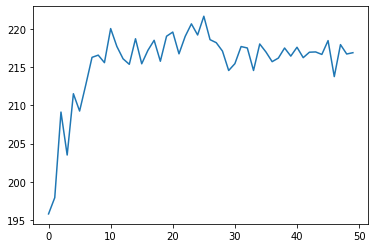

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mean_rewards)